In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

1/1 [==============================] - 0s 201ms/step


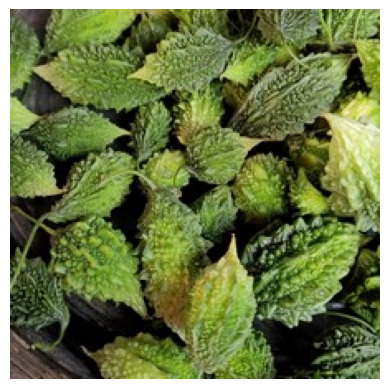

Predicted class: Bitter_Gourd
Confidence: 99.97380375862122%


In [36]:
# Load the trained model
model = tf.keras.models.load_model('./vegetable_classification_model.h5')

# Preprocess the input image
image_path = './data/Vegetable Images/test/Bitter_Gourd/1203.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0  # Normalize the pixel values

# Perform the prediction
prediction = model.predict(image_array)

# Interpret the results
predicted_class_index = np.argmax(prediction)
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjai', 'Brocolli', 'Cabbage', 'Capsicium', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']  # Add your class names here
predicted_class_name = class_names[predicted_class_index]

# Display the image
plt.imshow(image)
plt.axis('off')
plt.show()

# Display the predicted class and the confidence percentage
print("Predicted class:", predicted_class_name)
print("Confidence: {}%".format(prediction[0][predicted_class_index] * 100))

In [38]:
# use predict to calculate the accuracy of the model

# Load the test dataset
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    './data/Vegetable Images/test',
    image_size=(224, 224),
    batch_size=32)

# Preprocess the test dataset
test_dataset = test_dataset.map(lambda x, y: (x / 255.0, y))

# Perform the prediction
predictions = model.predict(test_dataset)

# Interpret the results
predicted_class_indexes = np.argmax(predictions, axis=1)
true_class_indexes = np.concatenate([y for x, y in test_dataset], axis=0)
accurate_predictions = np.equal(predicted_class_indexes, true_class_indexes)
accuracy = np.sum(accurate_predictions) / len(accurate_predictions)

# Display the accuracy
print("Accuracy: {}%".format(accuracy * 100))

Found 3000 files belonging to 15 classes.
94/94 [==============================] - 33s 338ms/step
Accuracy: 6.766666666666667%


In [4]:
# Use quantized model for prediction

# load the model
model = tf.lite.Interpreter(model_path="./vegetable_classification_model_quantized.tflite")
model.allocate_tensors()

# get the input and output tensors
input_details = model.get_input_details()
output_details = model.get_output_details()

# preprocess the input image
image_path = './data/Vegetable Images/test/Papaya/1198.jpg'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(224, 224))
image_array = tf.keras.preprocessing.image.img_to_array(image)
image_array = np.expand_dims(image_array, axis=0)
image_array = image_array / 255.0  # Normalize the pixel values

# set the input tensor
model.set_tensor(input_details[0]['index'], image_array)

# perform the prediction
model.invoke()

# get the output tensor
output_data = model.get_tensor(output_details[0]['index'])

# interpret the results
predicted_class_index = np.argmax(output_data)
class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjai', 'Brocolli', 'Cabbage', 'Capsicium', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']  # Add your class names here
predicted_class_name = class_names[predicted_class_index]

# display the predicted class
print("Predicted class:", predicted_class_name)

# prediction percentage
print("Prediction percentage:", output_data[0][predicted_class_index] * 100, "%")

Predicted class: Papaya
Prediction percentage: 54.6836256980896 %


: 

In [3]:
# Use real time camera feed for prediction

# load the model
model = tf.lite.Interpreter(model_path="./vegetable_classification_model_quantized.tflite")
model.allocate_tensors()

# get the input and output tensors
input_details = model.get_input_details()
output_details = model.get_output_details()

# load the camera
import cv2
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    
    # preprocess the input image
    image = cv2.resize(frame, (224, 224))
    image_array = tf.keras.preprocessing.image.img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = image_array / 255.0  # Normalize the pixel values

    # set the input tensor
    model.set_tensor(input_details[0]['index'], image_array)

    # perform the prediction
    model.invoke()

    # get the output tensor
    output_data = model.get_tensor(output_details[0]['index'])

    # interpret the results
    predicted_class_index = np.argmax(output_data)

    class_names = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjai', 'Brocolli', 'Cabbage', 'Capsicium', 'Carrot', 'Cauliflower', 'Cucumber', 'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']  # Add your class names here
    predicted_class_name = class_names[predicted_class_index]

    # display the predicted class
    cv2.putText(frame, predicted_class_name, (10, 35), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 0), 2)
    cv2.imshow('Vegetable Classification', frame)

    if cv2.waitKey(1) == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 